In [67]:
# usage of GPU memory 50 % bcz tensorflow library fails and will not be able to give correct results
from tensorflow.compat.v1 import ConfigProto                   # tensorflow version 2.2
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)


C:\Users\97155\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [68]:
# importing the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [69]:
# setting image size 224 which later on be use in training
image_size = [224, 224]
training_dataset = 'B:\CarBrand_Datasets/Train'
testing_dataset = 'B:\CarBrand_Datasets/Test'

In [70]:
# initializing resnet50, imagenet-> [3] means r,g,b color
# creating neural network-> input and output layer
resnet = ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top = False)


C:\Users\97155\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [71]:
resnet.summary() # only input layer is considered, no output layer

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [72]:
# so for output layer , we will not train existing weights
for layer in resnet.layers: 
    layer.trainable = False

In [73]:
# finding generating the output layer/classes
folders = glob('CarBrand_Datasets/Train/*') # glob will tell how many folder we have in training

In [74]:
len(folders)

3

In [75]:
folders

['CarBrand_Datasets/Train\\audi',
 'CarBrand_Datasets/Train\\lamborghini',
 'CarBrand_Datasets/Train\\mercedes']

In [76]:
# flatten the resnet layer to generate the output layer/classes
x = Flatten()(resnet.output)

In [77]:
prediction = Dense(len(folders), activation ='softmax')(x)
# creating the model object
model = Model(inputs=resnet.input,outputs=prediction)

In [78]:
model.summary() # number of output/classes is 3->car,mercedes,and lamborghini

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [79]:
 # defining the model -> compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [80]:
# reading the images / input from folder -> giving it a range [0-1]perform data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagenerator  = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)
test_datagenerator = ImageDataGenerator(rescale = 1./255) 

In [81]:
training_set = train_datagenerator.flow_from_directory('B:\CarBrand_Datasets/train',
                                                      target_size = (224,224),
                                                      batch_size = 32,
                                                      class_mode = 'categorical') # more than 2 classes


Found 64 images belonging to 3 classes.


In [82]:
testing_set = test_datagenerator.flow_from_directory('B:\CarBrand_Datasets/test',
                                                      target_size = (224,224),
                                                      batch_size = 32,
                                                      class_mode = 'categorical') # more than 2 classes


Found 58 images belonging to 3 classes.


In [83]:
# time to fit the model

fit_model = model.fit_generator(
training_set,
validation_data = testing_set,
epochs = 50,
steps_per_epoch=len(training_set),
validation_steps = len(testing_set)
)

Epoch 1/50
2/2 [==============================] - 113s 57s/step - loss: 9.7137 - acc: 0.4219 - val_loss: 8.1051 - val_acc: 0.3276
Epoch 2/50
2/2 [==============================] - 48s 24s/step - loss: 8.1467 - acc: 0.5469 - val_loss: 10.3736 - val_acc: 0.3276
Epoch 3/50
2/2 [==============================] - 42s 21s/step - loss: 2.1638 - acc: 0.8125 - val_loss: 11.8337 - val_acc: 0.3276
Epoch 4/50
2/2 [==============================] - 42s 21s/step - loss: 3.4615 - acc: 0.7656 - val_loss: 14.1051 - val_acc: 0.3276
Epoch 5/50
2/2 [==============================] - 49s 25s/step - loss: 0.1471 - acc: 0.9531 - val_loss: 15.9643 - val_acc: 0.3276
Epoch 6/50
2/2 [==============================] - 44s 22s/step - loss: 0.0044 - acc: 1.0000 - val_loss: 18.1973 - val_acc: 0.3276
Epoch 7/50
2/2 [==============================] - 40s 20s/step - loss: 0.2099 - acc: 0.9688 - val_loss: 19.5193 - val_acc: 0.3276
Epoch 8/50
2/2 [==============================] - 42s 21s/step - loss: 0.3619 - acc: 0.937

In [86]:
fit_model.history

{'loss': [9.713690280914307,
  8.146718978881836,
  2.1638211607933044,
  3.4615278244018555,
  0.1471235752105713,
  0.004422975704073795,
  0.2099115327000618,
  0.3618619590997696,
  0.26889827102422714,
  0.16364551638253033,
  0.01674314959888079,
  0.2895985245704651,
  0.008805772289633751,
  0.0,
  0.10432469472289041,
  3.9301318111029104e-07,
  0.0,
  3.03582169181027e-06,
  0.0,
  0.016669830307364464,
  5.1192801038268954e-05,
  9.313223081619526e-09,
  0.0,
  0.12114977091550827,
  1.3038510715546181e-08,
  0.0,
  0.0,
  5.308448294272239e-07,
  0.0,
  2.048909131247001e-08,
  0.0,
  0.0,
  0.0,
  9.313223081619526e-09,
  4.359843842394184e-06,
  2.795580257952679e-06,
  0.0,
  0.009191526100039482,
  1.0672591770344297e-06,
  1.5646141093839105e-07,
  0.0059091029688715935,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.1908964476533583e-07,
  0.0,
  0.0],
 'acc': [0.421875,
  0.546875,
  0.8125,
  0.765625,
  0.953125,
  1.0,
  0.96875,
  0.9375,
  0.96875,
  0.984375,
  

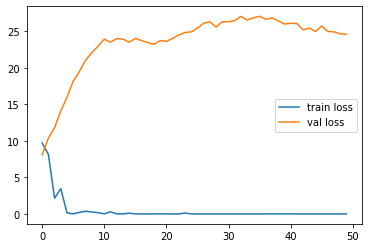

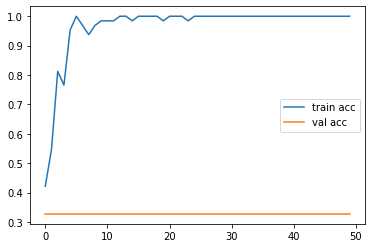

<Figure size 432x288 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(fit_model.history['loss'],label='train loss')
plt.plot(fit_model.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(fit_model.history['acc'],label='train acc')
plt.plot(fit_model.history['val_acc'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [96]:
# saving the model in a file -> h5-> save the file in multi-dimensional array
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [97]:
# prediction for test dataset
y_pred = model.predict(testing_set)

In [98]:
y_pred

array([[6.07269514e-15, 4.68849239e-18, 1.00000000e+00],
       [1.57074501e-14, 6.19023879e-18, 1.00000000e+00],
       [5.68363682e-14, 4.72052884e-17, 1.00000000e+00],
       [2.57591223e-14, 2.48697459e-17, 1.00000000e+00],
       [6.93087165e-15, 3.09249347e-17, 1.00000000e+00],
       [1.25868647e-14, 2.45968888e-17, 1.00000000e+00],
       [1.92270448e-14, 2.40388364e-17, 1.00000000e+00],
       [2.05759753e-14, 2.51476455e-17, 1.00000000e+00],
       [7.75670252e-15, 1.99704478e-17, 1.00000000e+00],
       [3.66166109e-14, 2.41279519e-17, 1.00000000e+00],
       [1.70787219e-14, 8.46858114e-17, 1.00000000e+00],
       [1.44937773e-14, 2.17622269e-17, 1.00000000e+00],
       [3.97830572e-14, 5.90663470e-17, 1.00000000e+00],
       [6.60647413e-15, 6.88025714e-18, 1.00000000e+00],
       [4.18378838e-15, 1.07537037e-17, 1.00000000e+00],
       [3.83434434e-14, 2.05676259e-17, 1.00000000e+00],
       [9.98677679e-15, 2.19096636e-17, 1.00000000e+00],
       [1.20994531e-14, 1.07696

In [99]:
# taking the value from testing set -> automatically gives the highest value from index [0,1,2] -> index [classes->audi, mercedes]
highest_index = np.argmax(y_pred, axis = 1)

In [100]:
highest_index

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [120]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [121]:
model=load_model('model_resnet50.h5')

In [109]:
# reading image from test data
img = image.load_img('B:\CarBrand_Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [105]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\97155\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\keras\\api\\_v1\\keras\\preprocessing\\image\\__init__.py'>

In [112]:
#converting the image into array -> data generator images are also converted into array
convert_img = image.img_to_array(img)

In [113]:
convert_img

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [115]:
# checking the shape of image
convert_img.shape

(224, 224, 3)

In [116]:
convert_img = convert_img/255

In [117]:
convert_img

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [123]:
# expanding the image
convert_img = np.expand_dims(convert_img,axis = 0)
img_data = preprocess_input(convert_img)
img_data.shape

(1, 224, 224, 3)

In [125]:
img_data

array([[[[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         ...,
         [-103.939   , -116.77116 , -123.62902 ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.74763 , -123.60941 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.743706, -123.60549 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        ...,

        [[-103.57822 , -116.27312 , -1

In [126]:
# predicting the output
model.predict(img_data)

array([[5.1959642e-08, 1.7136391e-09, 1.0000000e+00]], dtype=float32)

In [127]:
a = np.argmax(model.predict(img_data), axis = 1)

In [128]:
a

array([2], dtype=int64)